In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od

In [4]:
od.download('stackoverflow-developer-survey-2020')

0it [00:00, ?it/s]

 85%|████████▍ | 79945728/94603888 [00:01<00:00, 132512361.80it/s]
0it [00:00, ?it/s]
  0%|          | 0/8428 [00:00<?, ?it/s]

0it [00:00, ?it/s]



  0%|          | 0/2268 [00:00<?, ?it/s]

In [5]:
import os

In [6]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'survey_results_schema.csv', 'README.txt']

In [7]:
import pandas as pd

In [8]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

8192it [00:01, 5411.83it/s]             


In [9]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [10]:
survey_raw_df.shape

(64461, 61)

In [11]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [12]:
survey_raw_df.isnull()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,True,True,True,False,False,...,True,True,True,False,True,True,False,True,False,False
2,False,False,False,True,False,True,True,True,False,True,...,False,False,True,True,True,True,False,True,False,True
3,False,False,False,False,False,True,True,True,False,False,...,True,True,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,True,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,True,False,True,False,True,True,True,False,True,...,True,True,True,False,True,True,True,True,False,False
64457,False,True,False,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,True,False,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
64459,False,True,False,True,True,True,True,True,False,True,...,True,True,True,True,False,True,True,True,True,True


In [13]:
survey_raw_df.info()

94609408it [00:05, 17489937.35it/s]                               
16384it [00:03, 4682.75it/s]            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [14]:
survey_raw_df.tail()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN
64460,65112,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Spain,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",ASP.NET Core;jQuery,Angular;Angular.js;ASP.NET Core;jQuery,NaN,NaN,NaN,NaN


**make sample of data

In [15]:
survey_raw_df.sample

<bound method NDFrame.sample of        Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes

In [16]:
survey_raw_df.loc[2:145]

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,143,I am a developer by profession,Yes,25.0,10,Yearly,97500.0,97500.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,Angular.js,Just as welcome now as I felt last year,40.0,15,5
142,144,I am a developer by profession,Yes,32.0,14,Yearly,75000.0,75000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;jQuery,Angular;jQuery,Just as welcome now as I felt last year,38.0,16,10
143,145,"I am not primarily a developer, but I write co...",Yes,26.0,11,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Too long,No,NaN,NaN,NaN,Just as welcome now as I felt last year,37.0,4,3
144,146,I am a developer by profession,Yes,33.0,12,Yearly,580000.0,59320.0,Sweden,Swedish krona,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;React.js;Vue.js,ASP.NET;ASP.NET Core;React.js,Just as welcome now as I felt last year,40.0,21,12


In [17]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: Column and QuestionText. We can load it as Pandas Series with Column as the index and the QuestionText as the value.

In [18]:
schema_raw 

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

# use any title for any column do you want

In [19]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

# make Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

Demographics of the survey respondents and the global programming community
Distribution of programming skills, experience, and preferences
Employment-related information, preferences, and opinions
Let's select a subset of columns with the relevant data for our analysis.

In [20]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [21]:
selected_columns

['Country',
 'Age',
 'Gender',
 'EdLevel',
 'UndergradMajor',
 'Hobbyist',
 'Age1stCode',
 'YearsCode',
 'YearsCodePro',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'NEWLearn',
 'NEWStuck',
 'Employment',
 'DevType',
 'WorkWeekHrs',
 'JobSat',
 'JobFactors',
 'NEWOvertime',
 'NEWEdImpt',
 'Employment',
 'DevType',
 'WorkWeekHrs',
 'JobSat',
 'JobFactors',
 'NEWOvertime',
 'NEWEdImpt']

In [22]:
len(selected_columns)

27

make a copy for this data 

In [23]:
survey_df = survey_raw_df[selected_columns].copy()

In [24]:
survey_df 

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,JobFactors,NEWOvertime,NEWEdImpt,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,...,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,...,NaN,NaN,Fairly important,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,...,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,...,NaN,NaN,Very important,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,...,NaN,NaN,Very important,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


# look for data after make a copy

In [25]:
survey_df .shape

(64461, 27)

In [26]:
schema = schema_raw[selected_columns]

get a information for the data

In [27]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [28]:
survey_df['Gender'].value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

In [29]:
import numpy as np

In [30]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,JobFactors,NEWOvertime,NEWEdImpt,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
62286,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
43652,India,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18,5,Less than 1 year,C++;Java;JavaScript;Ruby,...,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Fairly important,Employed full-time,"Developer, back-end;Developer, full-stack;Engi...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Fairly important
55671,Morocco,21.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",Yes,19,2,Less than 1 year,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,...,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,"Independent contractor, freelancer, or self-em...","Developer, front-end",30.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
19343,United States,34.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,15,20,14,C#,...,"Industry that I’d be working in;Languages, fra...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,Employed full-time,"Developer, back-end",45.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
56923,Switzerland,26.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,15,8,1,Java;JavaScript;Python;R,...,Financial performance or funding status of the...,Occasionally: 1-2 days per quarter but less th...,Fairly important,Employed part-time,"Academic researcher;Developer, back-end;Develo...",34.0,Very dissatisfied,Financial performance or funding status of the...,Occasionally: 1-2 days per quarter but less th...,Fairly important
30694,Germany,26.0,Man,I never completed any formal education,NaN,Yes,16,3,1,HTML/CSS;JavaScript;PHP;SQL,...,Flex time or a flexible schedule;Financial per...,Occasionally: 1-2 days per quarter but less th...,NaN,Employed full-time,"Developer, back-end",40.0,Very dissatisfied,Flex time or a flexible schedule;Financial per...,Occasionally: 1-2 days per quarter but less th...,NaN
7030,India,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,6,15,5,Bash/Shell/PowerShell;Java;JavaScript;Swift;Ty...,...,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,Employed full-time,"Developer, full-stack;Developer, mobile;DevOps...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
45590,United States,35.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fine arts or performing arts (such as graphic ...,Yes,14,20,12,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,...,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Somewhat important,Employed full-time,"Developer, back-end",45.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Somewhat important
39619,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
7583,India,21.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engi

# #Make a Exploratory Analysis and Visualization

Before starting work, anything I should ask about the demographics of the respondents, for example, country, age, gender, educational level, and employment level.

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [32]:
schema.Country

'Where do you live?'

In [33]:
survey_df.Country.nunique()

183

use value country to make a defination number of responded

In [34]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12469
India                  8403
United Kingdom         3896
Germany                3890
Canada                 2191
France                 1898
Brazil                 1818
Netherlands            1343
Poland                 1278
Australia              1208
Spain                  1161
Italy                  1117
Russian Federation     1092
Sweden                  886
Pakistan                809
Name: Country, dtype: int64

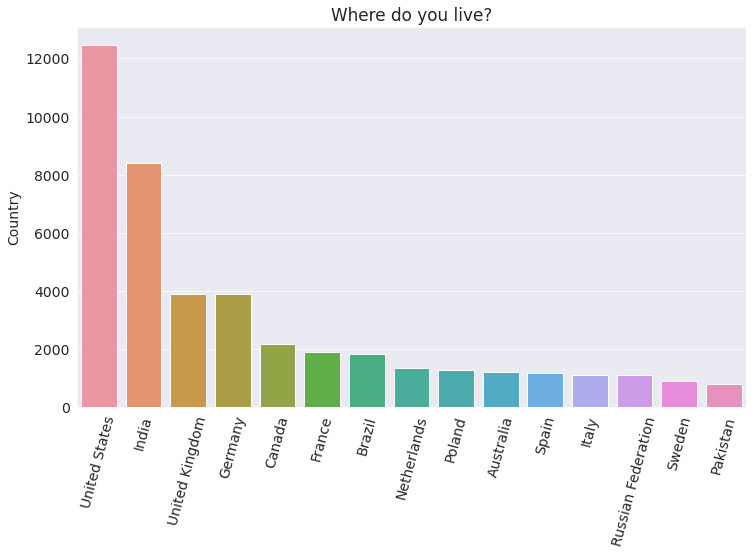

In [35]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

It seems that the United States and India are the ones with the largest percentage

About age

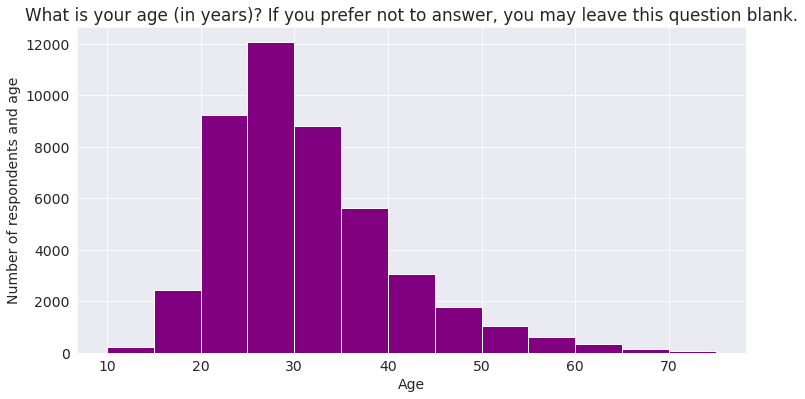

In [36]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents and age')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

# About Gender

In [37]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [38]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

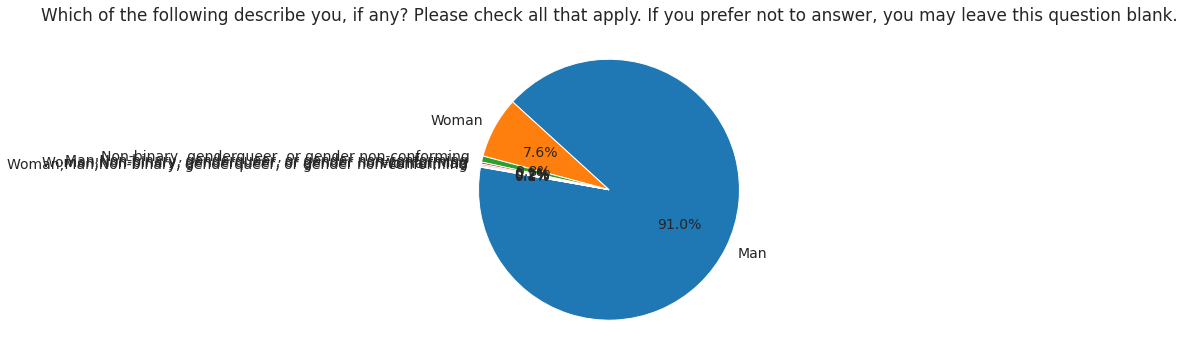

In [39]:
plt.figure(figsize=(10,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%0.1f%%', startangle=170);

Education level 

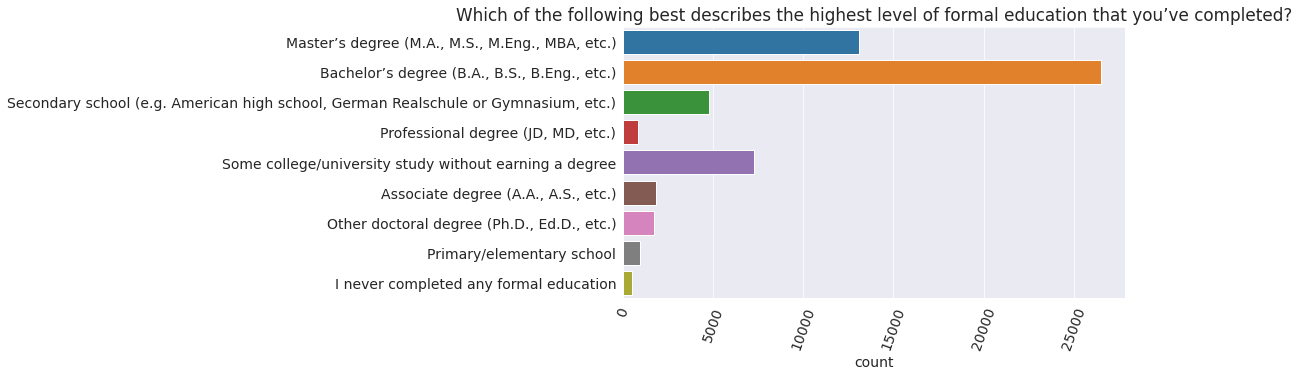

In [40]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=70);
plt.title(schema['EdLevel'])
plt.ylabel(None);

 It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

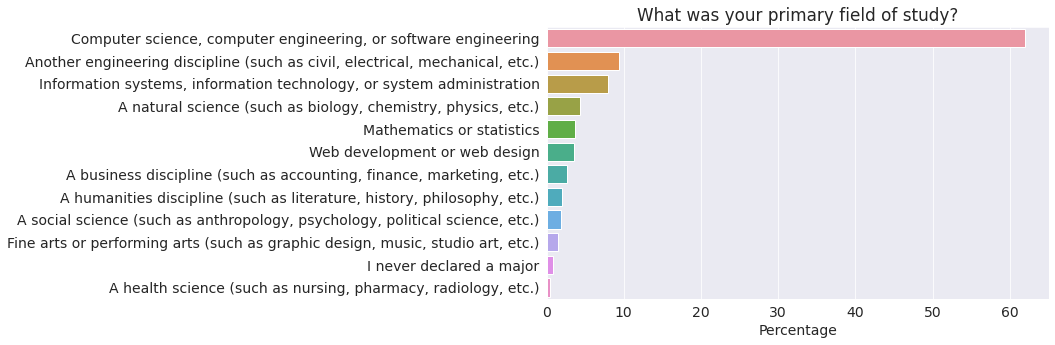

In [41]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');